# Malware Classification

**Data taken from**<br>
https://github.com/Te-k/malware-classification

Here is the plan that we will follow :

 - Extract as many features as we can from binaries to have a good training data set. The features have to be integers or floats to be usable by the algorithms
 - Identify the best features for the algorithm : we should select the information that best allows to differenciate legitimate files from malware.
 - Choose a classification algorithm
 - Test the efficiency of the algorithm and identify the False Positive/False negative rate

### How was the data generated
 - Some features were extracted using Manalyzer. The PE features extracted are almost used directly as they are integers (field size, addresses, parameters…)
 
 The author of data quotes:
 ```
 So I extracted all the PE parameters I could by using pefile, and considered especially the one that are relevant for identifying malware, like the entropy of section for packer detection. As we can only have a fix list of feature (and not one per section), I extracted the Mean, Minimum and Maximum of entropy for sections and resources.
 ```
 
For legitimate file, I gathered all the Windows binaries (exe + dll) from Windows 2008, Windows XP and Windows 7 32 and 64 bits, so exactly 41323 binaries. It is not a perfect dataset as there is only Microsoft binaries and not binaries from application which could have different properties, but I did not find any easy way to gather easily a lot of legitimate binaries, so it will be enough for playing.<br>
Regarding malware, I used a part of [Virus Share](https://virusshare.com) collection by downloading one archive (the 134th) and kept only PE files (96724 different files).<br>
I used [pefile](https://github.com/erocarrera/pefile) to extract all these features from the binaries and store them in a csv file (ugly code is here, data are here).



### Services used:
 - https://manalyzer.org : Manalyzer is a free service which performs static analysis on PE executables to detect undesirable behavior. Try it online, or check out the underlying software on https://github.com/JusticeRage/Manalyze
 - https://virusshare.com : VirusShare.com is a repository of malware samples to provide security researchers, incident responders, forensic analysts, and the morbidly curious access to samples of live malicious code.
 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## load the dataset

In [21]:
df = pd.read_csv("../dataset/malware.csv", sep="|")

In [22]:
df.head(10)

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
5,airappinstaller.exe,e6e5a0ab3b1a27127c5c4a29b237d823,332,224,258,9,0,512,46592,0,...,10,4.843545,2.718577,7.965023,3858.600000,104,14671,0,16,1
6,AcroBroker.exe,dd7d901720f71e7e4f5fb13ec973d8e9,332,224,290,9,0,222720,67072,0,...,7,3.892779,1.346314,5.232167,1629.142857,52,8648,72,16,1
7,AcroRd32.exe,540c61844ccd78c121c3ef48f3a34f0e,332,224,290,9,0,823808,650240,0,...,29,4.102636,1.664392,6.373890,11939.689655,94,270376,72,15,1
8,AcroRd32Info.exe,9afe3c62668f55b8433cde602258236e,332,224,290,9,0,4096,7168,0,...,4,5.097499,3.435993,5.929812,616.500000,94,1164,72,15,1
9,AcroTextExtractor.exe,ba621a96e44f6558c08cf25b40cb1bd4,332,224,290,9,0,29696,12800,0,...,2,4.235788,3.456169,5.015407,820.000000,716,924,72,15,1


### Scripts used to generate above data
 - https://github.com/Te-k/malware-classification/blob/master/checkmanalyzer.py
 - https://github.com/Te-k/malware-classification/blob/master/checkpe.py
 - https://github.com/Te-k/malware-classification/blob/master/generatedata.py

## Analysis

In [13]:
df.shape

(138047, 57)

In [15]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

## Distribution of legitimate and malwares

In [31]:
df["_type"] = "legit"
df.loc[df['legitimate'] == 0, '_type'] = "malware"
df['_type'].value_counts()

malware    96724
legit      41323
Name: _type, dtype: int64

In [36]:
df['_type'].value_counts(normalize=True) * 100

malware    70.065992
legit      29.934008
Name: _type, dtype: float64

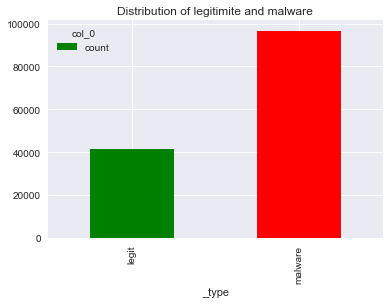

In [34]:
pd.crosstab(df['_type'], 'count').plot(kind='bar', color=['green', 'red'])
plt.title("Distribution of legitimite and malware")

In [37]:
## todo add more visualizations

## Feature Selection
The idea of feature selection is to reduce the 54 features extracted to a smaller set of feature which are the most relevant for differentiating legitimate binaries from malware.

In [38]:
legit_binaries = df[0:41323].drop(['legitimate'], axis=1)
malicious_binaries = df[41323::].drop(['legitimate'], axis=1)

## Manual data cleaning & feature selection

So a first way of doing it manually could be to check the different values and see if there is a difference between the two groups. For instance, we can take the parameter FileAlignment (which defines the alignment of sections and is by default 0x200 bytes) and check the values :

In [39]:
legit_binaries['FileAlignment'].value_counts()

512      36843
4096      4313
128         89
32          40
65536       36
16           2
Name: FileAlignment, dtype: int64

In [40]:
malicious_binaries['FileAlignment'].value_counts()

512     94612
4096     2074
128        18
1024       15
64          2
32          1
16          1
2048        1
Name: FileAlignment, dtype: int64

So if we remove the 20 malware having weird values here, there is not much difference on this value between the two groups, this parameter would not make a good feature for us.

On the other side, some values are clearly interesting like the max entropy of the sections which can be represented with an histogram:

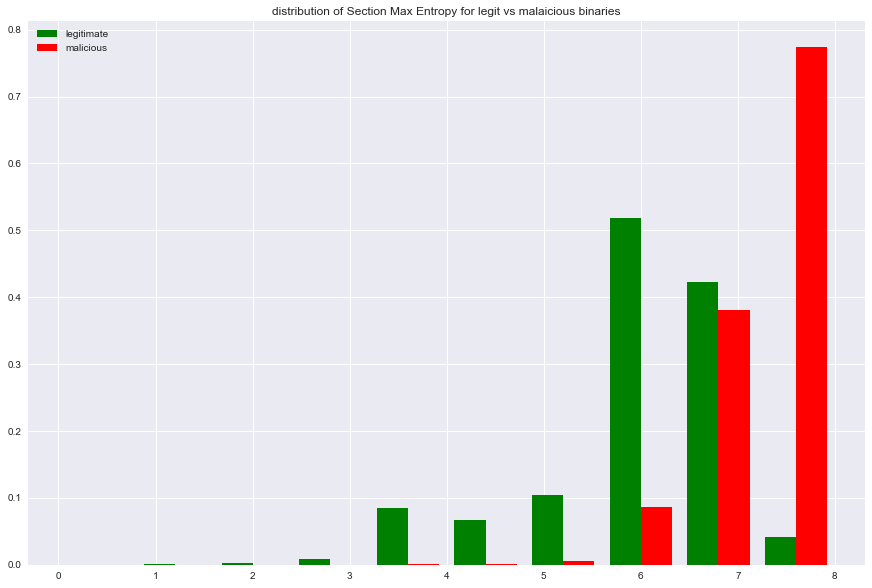

In [44]:
plt.figure(figsize=(15,10))
plt.hist([legit_binaries['SectionsMaxEntropy'], malicious_binaries['SectionsMaxEntropy']], range=[0,8], normed=True, color=["green", "red"],label=["legitimate", "malicious"])
plt.legend()
plt.title("distribution of Section Max Entropy for legit vs malaicious binaries")
plt.show()

In [48]:
def plotDistributionForFeature(colName, figsize=(7,5)):
    global legit_binaries
    global malicious_binaries
    plt.figure(figsize=figsize)
    plt.hist(
        [legit_binaries[colName], malicious_binaries[colName]],
        range=[0,8],
        normed=True,
        color=["green", "red"],
        label=["legitimate", "malicious"])

    plt.legend()
    plt.title("distribution of %s for legit vs malaicious binaries" % colName)
    plt.show()

C:\Users\minvada\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


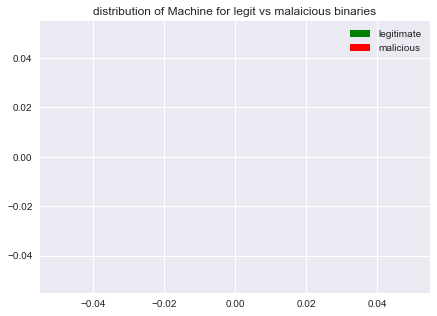

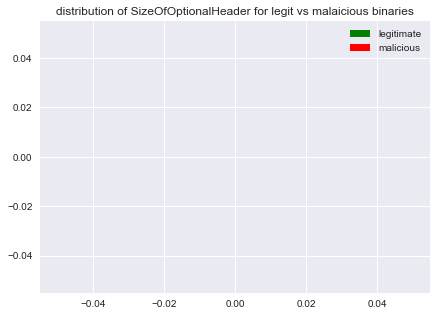

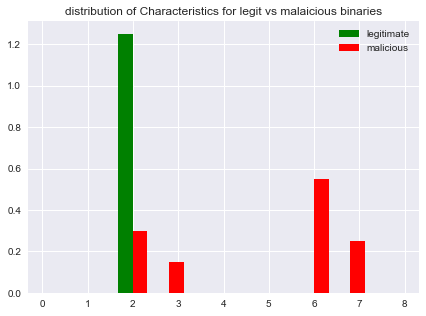

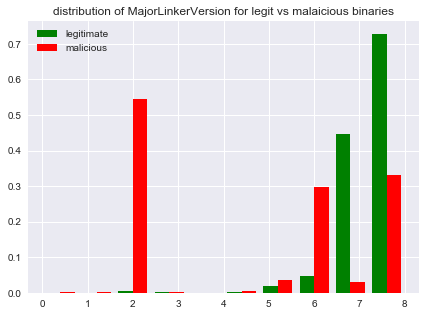

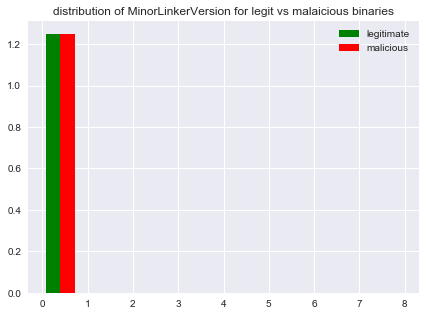

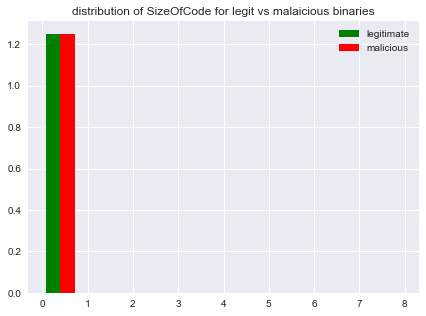

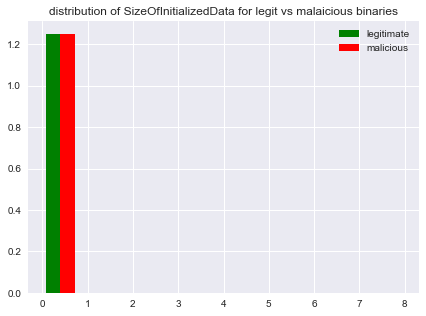

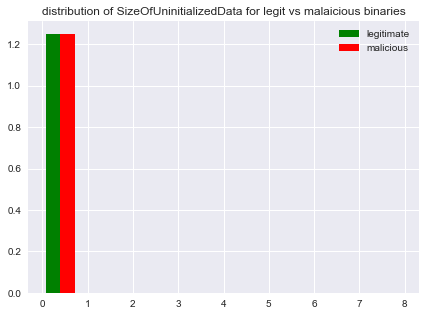

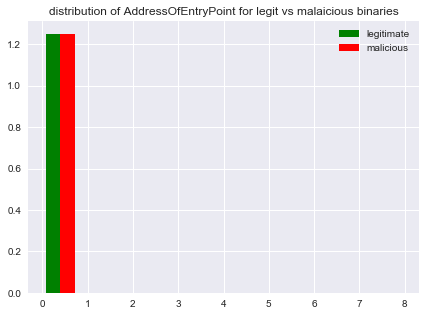

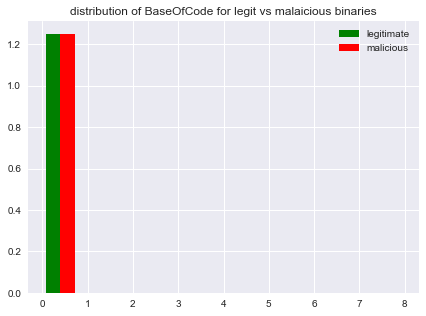

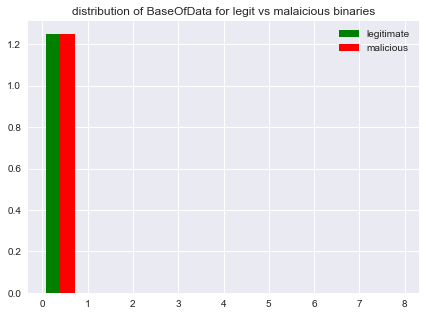

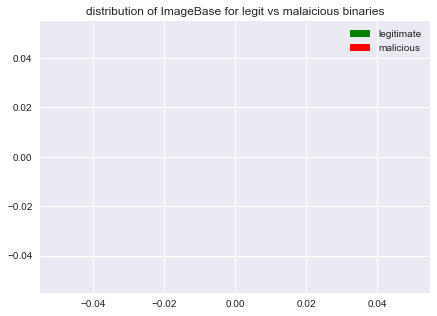

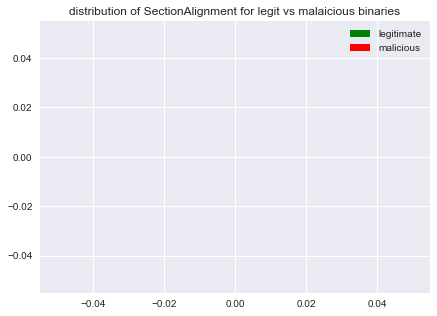

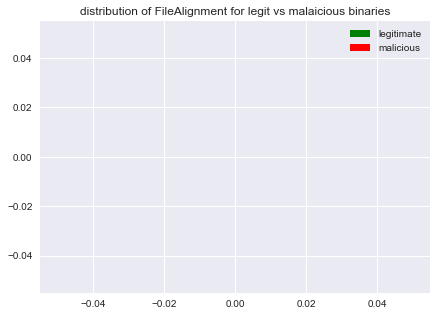

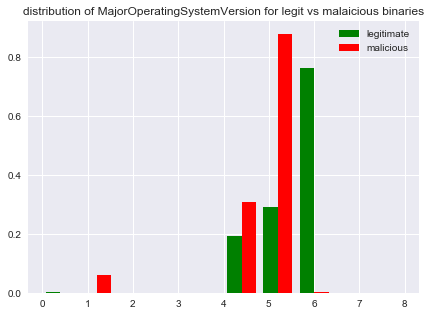

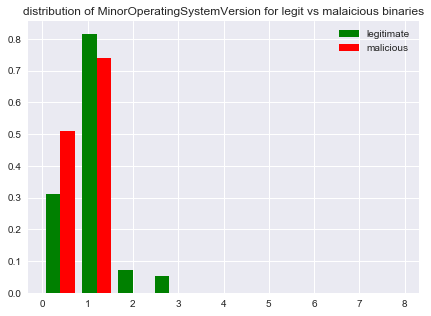

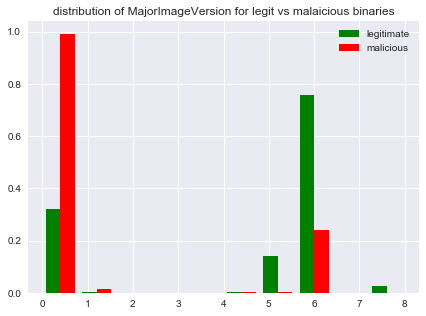

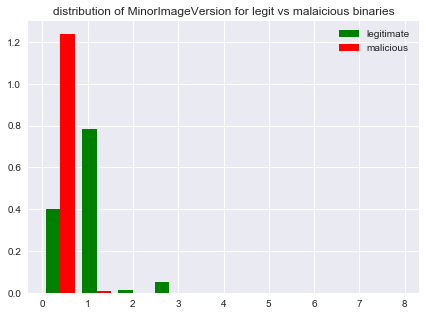

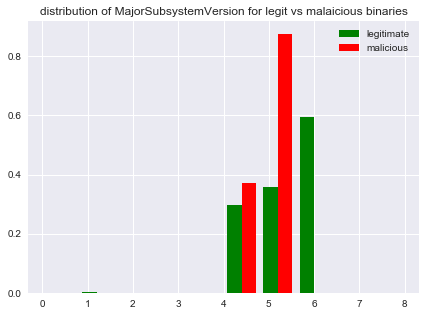

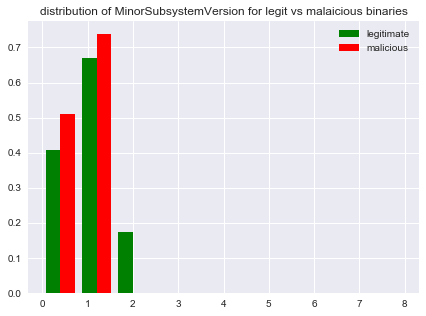

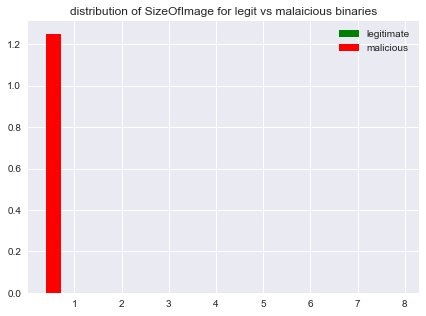

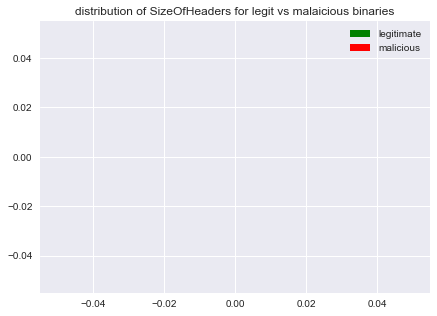

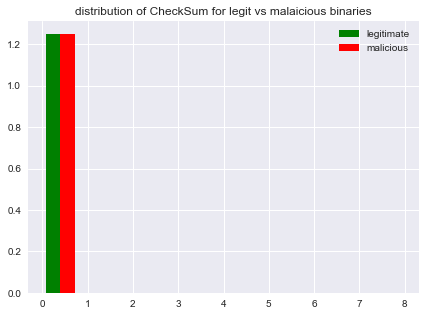

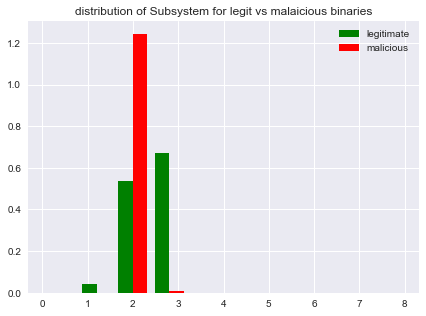

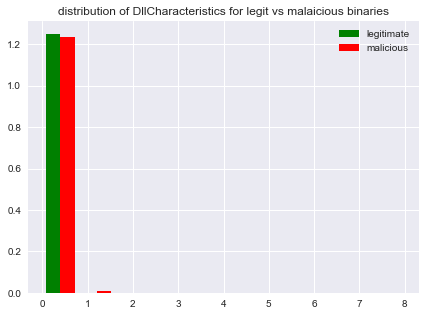

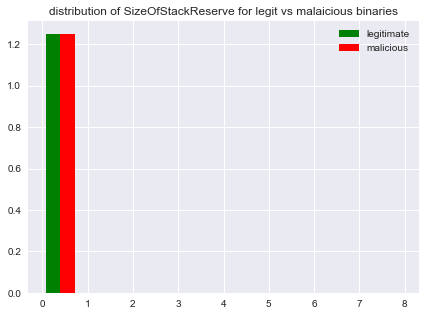

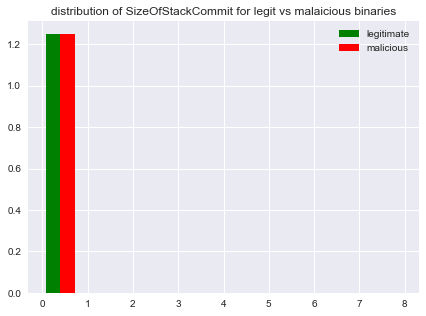

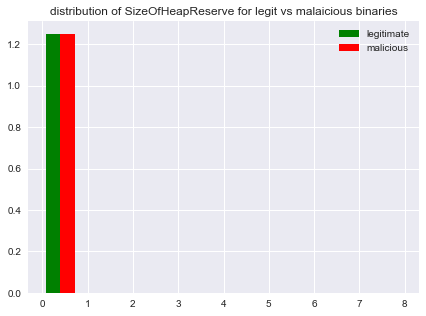

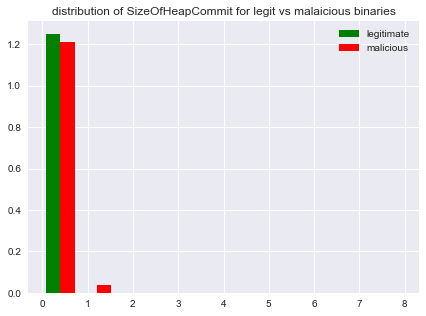

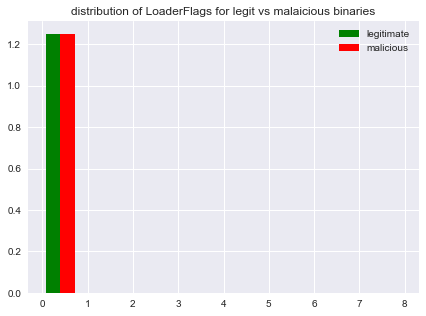

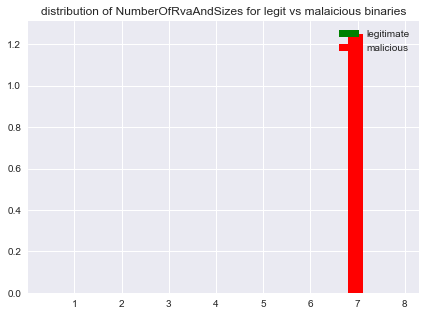

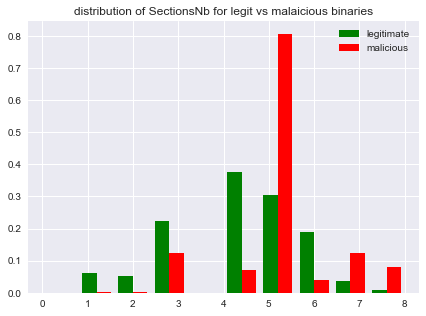

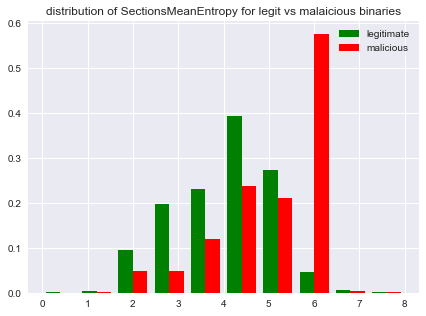

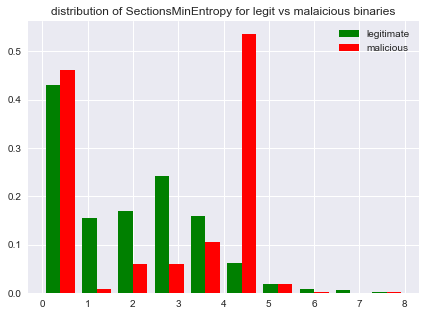

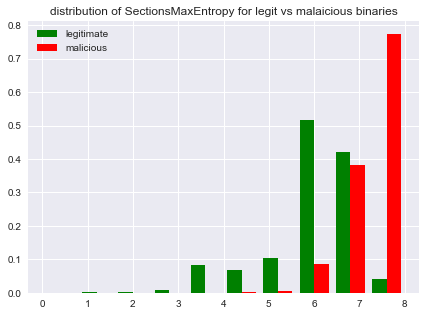

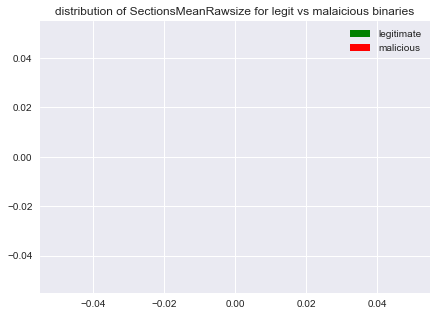

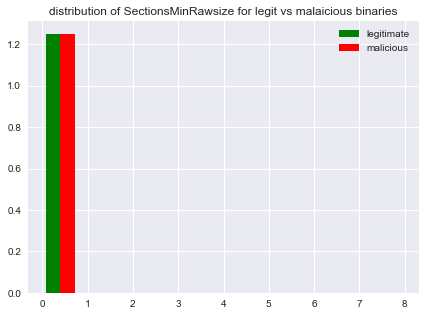

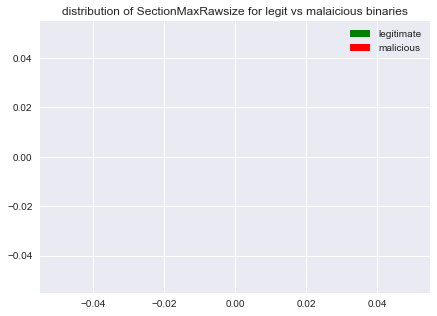

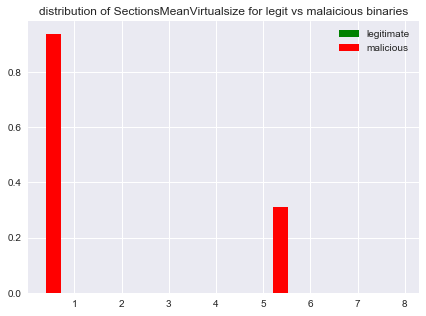

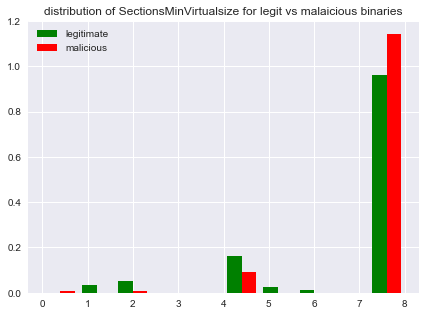

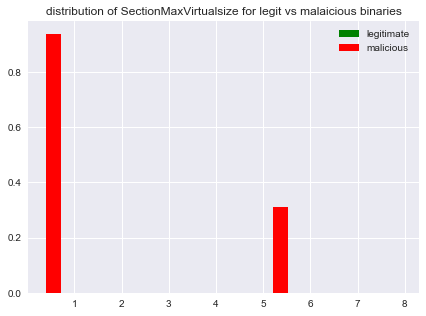

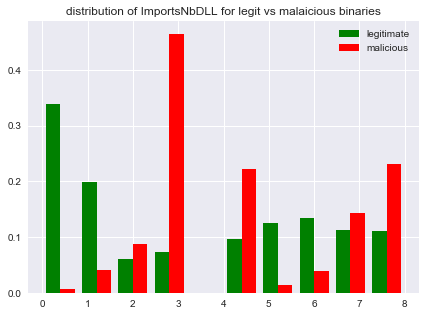

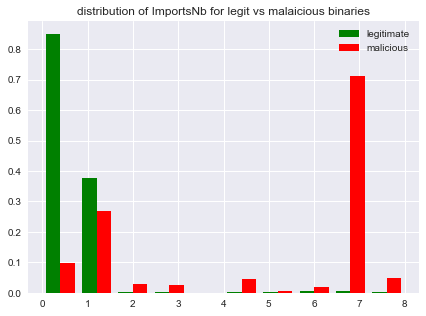

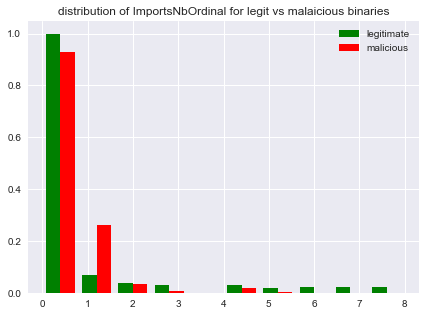

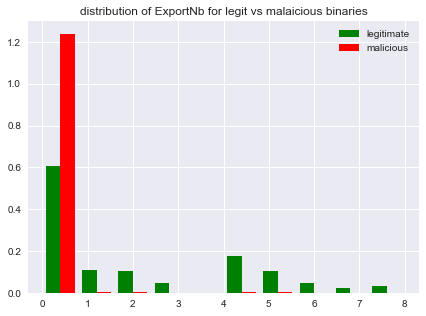

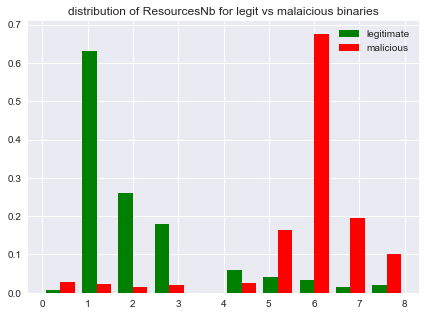

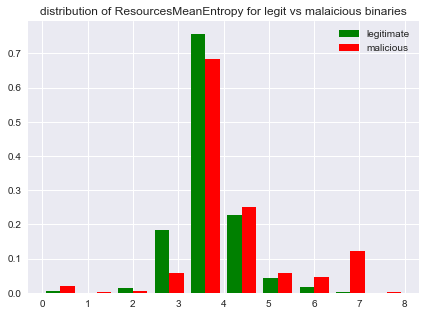

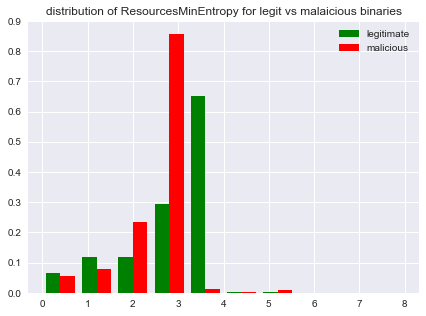

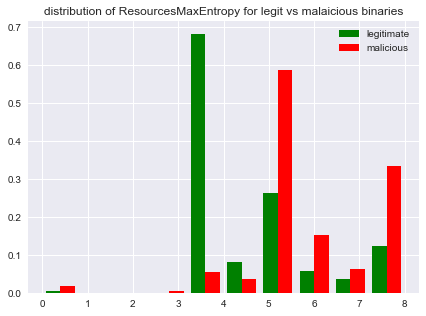

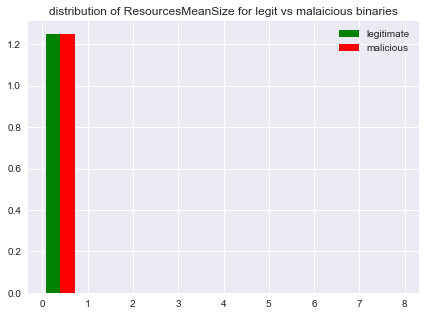

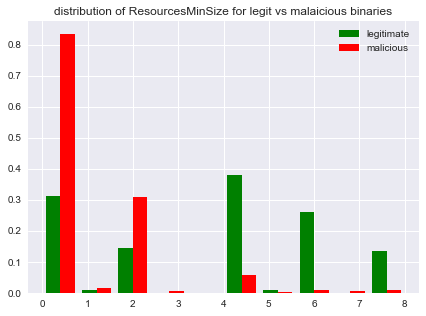

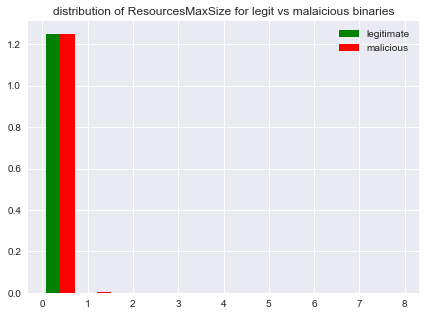

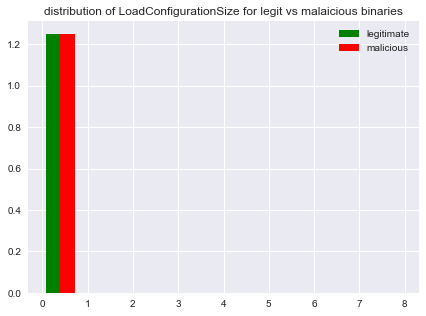

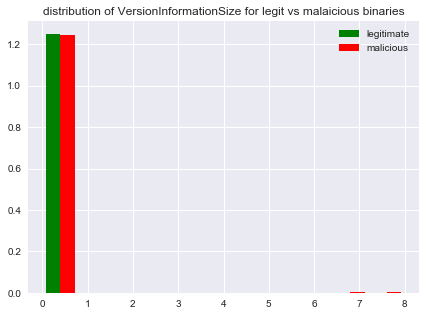

In [49]:
avoidCols = ['_type', 'Name', 'md5', 'legitimate']
for col in df.columns:
    if col not in avoidCols:
        plotDistributionForFeature(col)

## Automatic Feature Selection
some algorithms have been developed to identify the most interesting features and reduce the dimensionality of the data set (see the Scikit page for Feature Selection).

In our case, we will use the Tree-based feature selection:

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [54]:
X = df.drop(['Name', 'md5', 'legitimate', '_type'], axis=1).values
y = df['legitimate'].values
fsel = ExtraTreesClassifier().fit(X, y)

In [58]:
model = SelectFromModel(fsel, prefit=True)
X_new = model.transform(X)

In [59]:
print ("Shape before feaure selection: ", X.shape)
print ("Shape after feaure selection: ", X_new.shape)

Shape before feaure selection:  (138047, 54)
Shape after feaure selection:  (138047, 13)


So in this case, the algorithm selected 13 important features among the 54, and we can notice that indeed the SectionsMaxEntropy is selected but other features (like the Machine value) are surprisingly also good parameters for this classification :

In [61]:
nb_features = X_new.shape[1]
indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
for f in range(nb_features):
    print("%d. feature %s (%f)" % (f + 1, df.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))

1. feature DllCharacteristics (0.171699)
2. feature Machine (0.137223)
3. feature ImageBase (0.116016)
4. feature SectionsMaxEntropy (0.069832)
5. feature VersionInformationSize (0.065201)
6. feature ResourcesMaxEntropy (0.054561)
7. feature Subsystem (0.044800)
8. feature Characteristics (0.043807)
9. feature SizeOfOptionalHeader (0.035717)
10. feature SizeOfStackReserve (0.028173)
11. feature MajorOperatingSystemVersion (0.024026)
12. feature MajorSubsystemVersion (0.021732)
13. feature SectionsMeanEntropy (0.019922)


## Test train split
TODO: add why, and should this be done before the feature selection

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.2)

# Classification: selecting Models

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

algorithms = {
    "DecisionTree": DecisionTreeClassifier(max_depth=10),
    "RandomForest": RandomForestClassifier(n_estimators=50),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=50),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "LogisticRegression": LogisticRegression()
}

In [65]:
results = {}

In [70]:
print("\nNow testing algorithms")
for algo in algorithms:
    clf = algorithms[algo]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("%s : %f %%" % (algo, score*100))
    results[algo] = score

winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% success' % (winner, results[winner]*100))


Now testing algorithms
DecisionTree : 99.145237 %
RandomForest : 99.449475 %
GradientBoosting : 98.808403 %
AdaBoost : 98.569359 %
LogisticRegression : 30.144875 %

Winner algorithm is RandomForest with a 99.449475 % success


## Evaluation

In [73]:
from sklearn.metrics import confusion_matrix

#  Identify false and true positive rates
clf = algorithms[winner]
res = clf.predict(X_test)
mt = confusion_matrix(y_test, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

False positive rate : 0.383678 %
False negative rate : 0.937162 %


## Results
### 99.45% Accuracy
### False positive rate : 0.383678 %
### False negative rate : 0.937162 %

### Why it’s not enough?
First, a bit of vocabulary for measuring IDS accuracy (taken from Wikipedia):

 - *Sensitivity* : the proportion of positives identified as such (or true positive rate)
 - *Specificity* : the proportion of negatives correctly identified as such (or true negative)
 - *False Positive Rate (FPR)* : the proportion of events badly identified as positive over the total number of negatives
 - *False Negative Rate (FNR)* : the proportion of events badly identified as negative over the total number of positives

### So why 99.45% is not enough?

 - Because you can’t just consider the sensitivity/specificity of the algorithm, you have to consider the malicious over legitimate traffic ratio to understand how many alerts will be generated by the IDS. And this ratio is extremely low.

 - Let’s consider the you have 1 malicious event every 10 000 event (it’s a really high ratio) and 1 000 000 events per day, you will have :

 - 100 malicious events, 99 identified by the tool and 1 false negative (0.93% FNR but let’s consider 1% here)
 
 - 999 900 legitimate events, around *3835* identified as malicious (0.38% FPR)
 - So in the end, the *analyst would received 3934 alerts per day* with only *99 true positive in it (2.52%)*. Your IDS is useless here.

## Visualization
To be done